In [31]:
#importamos los paquetes necesarios para trabajar
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

%matplotlib inline

In [33]:
#cargamos el dataset y damos una vista rápida
df=pd.read_csv('DataCoSupplyChainDataset-utf8.csv')

#limitamos filas y columnas para evitar sobrecarga
pd.set_option('display.max_rows', 500)  #número máximo de filas
pd.set_option('display.max_columns', 500)  #número máximo de columnas
pd.set_option('display.width', 1000)  #ancho máximo en caracteres

df.head()  #verificación de carga correcta mostrando las primeras 5 filas

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [35]:
df.columns  #visualizamos los nombres de las columnas del df

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

## Filtramos por los datos de interes

In [38]:
data=df.copy()  #creamos una copia para no alterar los datos del df original
#especificamos las columnas con las que queremos trabajar
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']
#filtramos el nueva df con las columnas seleccionadas
df1=df[FeatureList]

df1.head()  #verificación

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Visualización de Datos

## Filtramos por "Delivery Status"

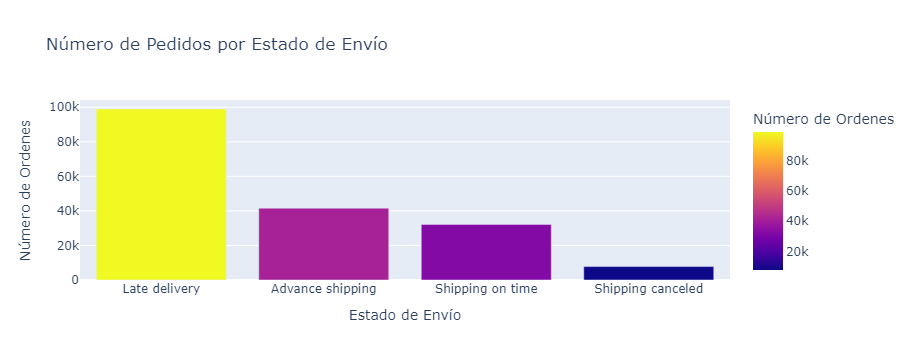

In [66]:
#agrupa el df por el estado de entrega, cuenta el número de pedidos en cada estado, convierte el resultado a un nuevo DataFrame (data_delivery_status) y lo ordena de mayor a menor según el número de pedidos
data_delivery_status=df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

#creamos un gráfico de barras que muestra la cantidad de pedidos por estado de entrega. 
#Las barras están coloreadas según el número de pedidos, y las etiquetas de los ejes se establecen para una visualización clara.
fig = px.bar(
    data_delivery_status,
    x='Delivery Status',            # Etiqueta para el eje x
    y='Number of Orders',           # Etiqueta para el eje y
    color='Number of Orders',       # Color de las barras basado en el número de pedidos
    labels={
        'Delivery Status': 'Estado de Envío',     # Etiqueta personalizada para el eje x
        'Number of Orders': 'Número de Ordenes'  # Etiqueta personalizada para el eje y
    },
    title='Número de Pedidos por Estado de Envío'  # Título del gráfico
)

# Muestra el gráfico
fig.show()

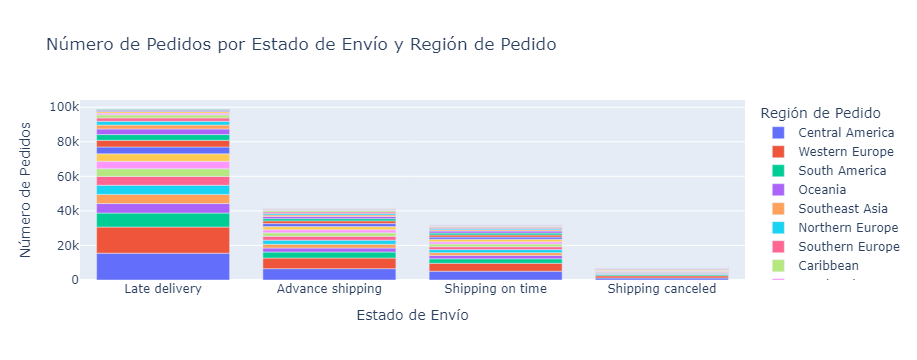

In [68]:
#agrupa el df por el estado de entrega y por región de pedido, cuenta el número de pedidos de cada combinación, convierte el resultado a un nuevo DataFrame (data_delivery_status_region) y lo ordena de mayor a menor según el número de pedidos
data_delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

#creamos un gráfico de barras que muestra el número de pedidos para cada estado de entrega, diferenciados por región
#Las barras están coloreadas según la región, y las etiquetas de los ejes se establecen para una visualización clara.
fig = px.bar(
    data_delivery_status_region,
    x='Delivery Status',            # Eje x: Estado de Envío
    y='Number of Orders',           # Eje y: Número de Pedidos
    color='Order Region',           # Colores basados en la Región de Pedido
    labels={
        'Delivery Status': 'Estado de Envío',
        'Number of Orders': 'Número de Pedidos',
        'Order Region': 'Región de Pedido'
    },
    title='Número de Pedidos por Estado de Envío y Región de Pedido'  # Título del gráfico
)
# Mostrar el gráfico
fig.show()

Centroamérica y Europa Occidental tienen los pedidos entregados con más retraso

# Los 20 principales clientes con respecto a la cantidad de pedidos.

C:\Users\Lalita\AppData\Local\Temp\ipykernel_15188\145308542.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



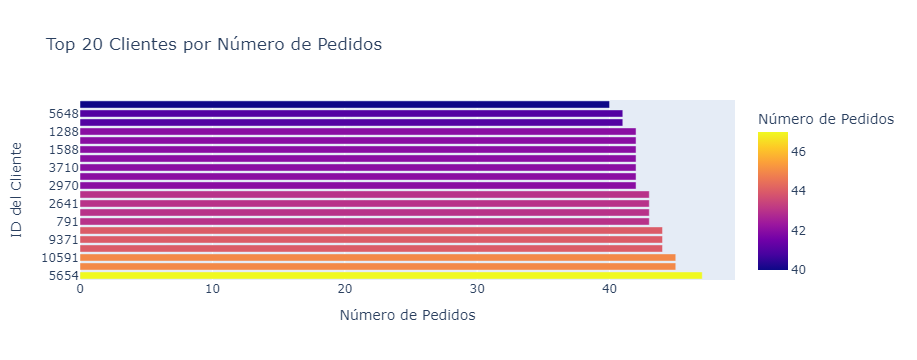

In [72]:
#Creamos una nueva columna en el df1 para identificar los clientes (lo convertimos en string)
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

#agrupa el df por el id del cliente, cuenta el número de pedidos por  cada uno y ordena los resultados por el número de pedidos en orden descendente.
data_customers=df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by='Number of Orders', ascending=False)

#creamos un gráfico de barras que muestra los 20 clientes con más pedidos
fig = px.bar(
    data_customers.head(20),              # Mostrar solo los 20 clientes principales
    x='Number of Orders',                # Eje x: Número de Pedidos
    y='Customer_ID_STR',                 # Eje y: ID del Cliente
    color='Number of Orders',            # Color basado en el Número de Pedidos
    labels={
        'Number of Orders': 'Número de Pedidos',
        'Customer_ID_STR': 'ID del Cliente'
    },
    title='Top 20 Clientes por Número de Pedidos'  # Título del gráfico
)

# Mostrar el gráfico
fig.show()

# Los 20 clientes principales en cuanto a ganancias de todos los pedidos

C:\Users\Lalita\AppData\Local\Temp\ipykernel_15188\755305802.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



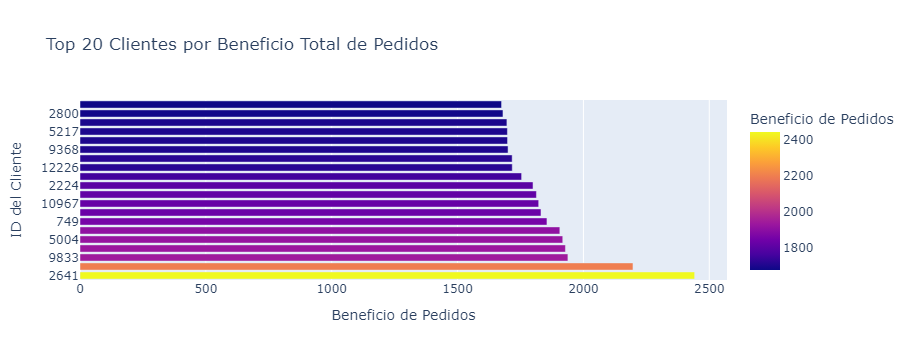

In [75]:
#Creamos una nueva columna en el df1 para identificar los clientes (lo convertimos en string)
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

#agrupa el df por el id del cliente, suma el total de beneficios por pedido por  cada uno y ordena los resultados por el número de beneficios en orden descendente.
data_customers_profit=df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

#creamos un gráfico de barras que muestra los 20 clientes con mayores beneficios
fig = px.bar(
    data_customers_profit.head(20),                  # Mostrar solo los 20 principales clientes
    x='Profit of Orders',                            # Eje x: Beneficio Total de Pedidos
    y='Customer_ID_STR',                            # Eje y: ID del Cliente
    color='Profit of Orders',                        # Colores basados en el Beneficio Total
    labels={
        'Profit of Orders': 'Beneficio de Pedidos',
        'Customer_ID_STR': 'ID del Cliente'
    },
    title='Top 20 Clientes por Beneficio Total de Pedidos'  # Título del gráfico
)

# Mostrar el gráfico
fig.show()